In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


### **1. 판매데이터 분석**

**1) commerce_data.csv 파일을 읽어와 데이터의 형태를 확인합니다.**  
자료의 구조를 확인합니다.  
제품 카테고리의 종류를 알아봅니다.

In [5]:
import pandas as pd
df1=pd.read_csv("commerce_data_utf_sep.csv")
df1

,collect_day,good_id,pum_id,pum_name,good_name,sales_price,city,store
0,2019-03-01,1000456210,I053020,스케치북,묶음상품 )스케치북 4절(220g 17매)x9개 드로북 드로잉북 그림스케치북 스케치...,68700,울산,매장
1,2019-03-01,1000461046,L012010,면도기,[쉬크] 쉬크 하이드로 5 면도기 가정용면도기 남자용면도기 가정용남자면도기 면도기 ...,21850,부산,매장
2,2019-03-01,1000469476,C021030,운동화,(옵션 : 265) 아디다스 울트라부스트 런닝화(BB6168) 커플운동화 여성운동화...,219190,부산,온라인
3,2019-03-01,1000469524,C013010,점퍼,롱야상 웰론 롱패딩 AM 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩,137620,경기,매장
4,2019-03-01,1000472413,C013010,점퍼,롱야상 롱후드 MA1 BW 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩,112980,강원,매장
...,...,...,...,...,...,...,...,...
140544,2019-03-01,4685829,C014020,유아복,[NFL 키즈] NFL부분절개팬츠,59000,강원,온라인
140545,2019-03-01,468610568,C011010,남자외의,[JEEP(지프)][JEEP]19S/S 뽀글이 패딩 베스트 JK1JPU644(하남점),189000,경기,매장
140546,2019-03-01,468613603,C011050,남자내의,(사이즈 : 105) 면스판 메쉬 남자 드로즈 팬티 025 3종세트 속옷팬티 남성사...,22550,부산,매장
140547,2019-03-01,468633361,A011100,라면,인도푸드 인도미 미고랭라면(10개) 봉지라면 즉석라면 인도푸드 라면 즉석식품,15640,서울,매장


In [6]:
import numpy as np
np.unique(df1["pum_name"])

array(['가정용비닐용품', '간장', '고구마', '고등어', '고추장', '고춧가루', '공책', '과일가공품',
       '구강세정제', '구두', '국수', '기능성음료', '기초화장품', '김', '김치', '껌', '낙지',
       '남자내의', '남자상의', '남자외의', '남자하의', '냉동식품', '단무지', '당면', '된장', '드레싱',
       '등산복', '딸기', '땅콩', '라면', '마른멸치', '면도기', '미역', '밀가루', '바디워시', '밤',
       '방향제', '배', '복사용지', '부엌용세제', '북어채', '분유', '블루베리', '비스킷', '빵', '사과',
       '살충제', '색조화장품', '생강', '생선통조림', '생수', '샴푸', '설탕', '섬유유연제', '세탁세제',
       '소금', '소시지', '수박', '스낵과자', '스웨터', '스케치북', '습기제거제', '식용유', '식초',
       '실내화', '쌀', '아동복', '아동화', '아몬드', '아이스크림', '여자내의', '여자상의', '여자외의',
       '여자하의', '운동복', '운동화', '원피스', '유아복', '이유식', '잼', '전구', '전기레인지',
       '전복', '점퍼', '즉석식품', '지갑', '참기름', '참외', '찹쌀', '청바지', '청소용세제', '치약',
       '치즈', '칫솔', '카레', '커피', '컴퓨터소모품', '콩', '키위', '키친타월', '탄산음료', '토마토',
       '티셔츠', '파스타면', '파프리카', '풋고추', '프린터', '필기구', '헤어드라이어', '헬스기구', '현미',
       '혼합음료', '혼합조미료', '화장지', '회화용구'], dtype=object)

**2) 제품군별 최저판매가, 최고판매가, 평균, 표준편차를  구해봅니다.**

In [7]:
df1.sales_price
df1['sales_price']

0          68700
1          21850
2         219190
3         137620
4         112980
           ...  
140544     59000
140545    189000
140546     22550
140547     15640
140548      1950
Name: sales_price, Length: 140549, dtype: int64

In [8]:
import numpy as np
df1['sales_price'] = df1['sales_price'].astype(int)
print(df1.dtypes)
df1.groupby('pum_name')['sales_price'].agg(['min','max','mean','std'])

collect_day    object
good_id         int64
pum_id         object
pum_name       object
good_name      object
sales_price     int64
city           object
store          object
dtype: object


,min,max,mean,std
pum_name,,,,
가정용비닐용품,4490,6790,5640.000000,1626.345597
간장,1420,384000,49097.931526,48703.252600
고구마,1100,76900,25494.117647,13615.345042
고등어,950,808020,44563.573265,39055.563713
고추장,1000,206700,51438.817006,34666.216211
...,...,...,...,...
현미,3000,115000,27282.419355,30969.144384
혼합음료,590,189000,34347.066667,22439.443511
혼합조미료,930,384000,19288.571429,52339.183112


In [9]:
group_min=df1['sales_price'].groupby(df1['pum_name']).min()
group_max=df1['sales_price'].groupby(df1['pum_name']).max()
group_mean=df1['sales_price'].groupby(df1['pum_name']).mean()
group_std=df1['sales_price'].groupby(df1['pum_name']).std()

code에 group_min, group_max, group_mean, group_std를 각각 입력하여서도 제품군별 최저판매가, 최고판매가, 평균, 표준편차를  구할 수 있습니다.

**3) 패션 관련 제품군만으로 새로운 데이터프레임을 만든 후, 온라인에서 가장 잘 팔린 제품 10개를 찾아봅니다.**  
제품군을 추리는 것은 개인의 판단에 따르면 됩니다.  
데이터프레임이 제대로 만들어졌는지 확인합니다.

In [10]:
temp1 = []
for i in range(len(df1)):
    if 'C' in df1['pum_id'].loc[i]:
        src1 = df1['pum_id'].loc[i]
        src2 = df1['pum_name'].loc[i]
        src3 = df1['sales_price'].loc[i]
        src4 = df1['city'].loc[i]
        src5 = df1['store'].loc[i]
        src6 = df1['good_name'].loc[i]
        temp1.append([src1,src2,src3,src4,src5,src6])
df2 = pd.DataFrame(temp1)
df2.columns = ['pum_id','pum_name','sales_price','city','store','good_name']
df2

,pum_id,pum_name,sales_price,city,store,good_name
0,C021030,운동화,219190,부산,온라인,(옵션 : 265) 아디다스 울트라부스트 런닝화(BB6168) 커플운동화 여성운동화...
1,C013010,점퍼,137620,경기,매장,롱야상 웰론 롱패딩 AM 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩
2,C013010,점퍼,112980,강원,매장,롱야상 롱후드 MA1 BW 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩
3,C011020,남자상의,34640,울산,온라인,(컬러선택 : MS-503 화이트 | 사이즈선택 : L) ACC(필골드)MS501n...
4,C013010,점퍼,66180,울산,온라인,빅사이즈 블루종 JK700 빅사이즈 블루종 야구점퍼 점퍼 겨울점퍼
...,...,...,...,...,...,...
90773,C011010,남자외의,125300,울산,온라인,[JEEP(지프)][JEEP]19S/S 뽀글이 베스트 GK1JPU646(마산점)
90774,C013010,점퍼,97650,부산,온라인,[시에로(siero)]라글란 소매 이중에리 점퍼(SC1JPF079)(센텀시티점)
90775,C014020,유아복,59000,강원,온라인,[NFL 키즈] NFL부분절개팬츠
90776,C011010,남자외의,189000,경기,매장,[JEEP(지프)][JEEP]19S/S 뽀글이 패딩 베스트 JK1JPU644(하남점)


In [11]:
df1[df1['pum_id'].str.contains('C')] # 


,collect_day,good_id,pum_id,pum_name,good_name,sales_price,city,store
2,2019-03-01,1000469476,C021030,운동화,(옵션 : 265) 아디다스 울트라부스트 런닝화(BB6168) 커플운동화 여성운동화...,219190,부산,온라인
3,2019-03-01,1000469524,C013010,점퍼,롱야상 웰론 롱패딩 AM 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩,137620,경기,매장
4,2019-03-01,1000472413,C013010,점퍼,롱야상 롱후드 MA1 BW 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩,112980,강원,매장
5,2019-03-01,1000473420,C011020,남자상의,(컬러선택 : MS-503 화이트 | 사이즈선택 : L) ACC(필골드)MS501n...,34640,울산,온라인
6,2019-03-01,1000474171,C013010,점퍼,빅사이즈 블루종 JK700 빅사이즈 블루종 야구점퍼 점퍼 겨울점퍼,66180,울산,온라인
...,...,...,...,...,...,...,...,...
140542,2019-03-01,468552873,C011010,남자외의,[JEEP(지프)][JEEP]19S/S 뽀글이 베스트 GK1JPU646(마산점),125300,울산,온라인
140543,2019-03-01,468581129,C013010,점퍼,[시에로(siero)]라글란 소매 이중에리 점퍼(SC1JPF079)(센텀시티점),97650,부산,온라인
140544,2019-03-01,4685829,C014020,유아복,[NFL 키즈] NFL부분절개팬츠,59000,강원,온라인
140545,2019-03-01,468610568,C011010,남자외의,[JEEP(지프)][JEEP]19S/S 뽀글이 패딩 베스트 JK1JPU644(하남점),189000,경기,매장


**4) 위 3의 데이터프레임에서 온라인에서 가장 잘 팔린 제품 10개를 찾아봅니다.**

- #NAME 으로 나오는 데이터들 지우기

In [12]:
df22 = df2.copy()

temp1 = df22.replace('#NAME?',np.NaN)
print(len(temp1))
temp2 = temp1.dropna()
print(len(temp2))
df_drop = temp2.copy()
print(df_drop)


90778
90718
        pum_id  ...                                          good_name
0      C021030  ...  (옵션 : 265) 아디다스 울트라부스트 런닝화(BB6168) 커플운동화 여성운동화...
1      C013010  ...               롱야상 웰론 롱패딩 AM 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩
2      C013010  ...              롱야상 롱후드 MA1 BW 롱패딩 롱야상 후드패딩 패딩점퍼 롱 패딩
3      C011020  ...  (컬러선택 : MS-503 화이트 | 사이즈선택 : L) ACC(필골드)MS501n...
4      C013010  ...               빅사이즈 블루종 JK700 빅사이즈 블루종 야구점퍼 점퍼 겨울점퍼
...        ...  ...                                                ...
90773  C011010  ...       [JEEP(지프)][JEEP]19S/S 뽀글이 베스트 GK1JPU646(마산점)
90774  C013010  ...       [시에로(siero)]라글란 소매 이중에리 점퍼(SC1JPF079)(센텀시티점)
90775  C014020  ...                                 [NFL 키즈] NFL부분절개팬츠
90776  C011010  ...    [JEEP(지프)][JEEP]19S/S 뽀글이 패딩 베스트 JK1JPU644(하남점)
90777  C011050  ...  (사이즈 : 105) 면스판 메쉬 남자 드로즈 팬티 025 3종세트 속옷팬티 남성사...

[90718 rows x 6 columns]


In [13]:
df3 = df_drop['store'] == '온라인' # boolen
df4 = df_drop[df3] # True, False
df4.groupby('good_name').agg('count').sort_values('pum_id', ascending=False).head(10)

,pum_id,pum_name,sales_price,city,store
good_name,,,,,
[폴햄 (POLHAM)](남) 코튼 포플린 스트라이프 셔츠 (PHZ1WC1012)[갤러리아],7,7,7,7,7
폼폼이포인트숏코트(N184XWC941)/ 나이스클랍,6,6,6,6,6
여성 융털 후드 롱 원피스,5,5,5,5,5
[에트로]에트로(ETRO)맨즈 남성셔츠[갤러리아],5,5,5,5,5
[꼬레하우씨] (사이즈 : XL | 색상 : 검정) (남성무보플보온바지)매서운 한파에 특수 기능성 보온내의재입고시케이스변경,5,5,5,5,5
네스파 반팔티셔츠무지남자여성커플단체면티빅사이즈,5,5,5,5,5
[폴햄 (POLHAM)](공용)코튼 베이직 브이넥 반팔티셔츠 (PHZ2TR3820)[갤러리아],5,5,5,5,5
베이직 포그니 퍼레깅스,5,5,5,5,5
남자셔츠 차이나카라 체크 배색 반팔셔츠 J0417024,5,5,5,5,5


**4) 위 3의 데이터프레임에서 카테고리, 도시별 매출액 합계, 매출액 평균을 알아봅니다.**

- 카테고리 : pum_name
- 도시별 매출액합계 : df['sales_price'].groupby('city').agg('sum')

In [14]:
src1= df_drop['city'].unique()
src2= df_drop['pum_name'].unique()
mylist = []
for i in range(len(src1)): # 도시
    for j in range(len(src2)): # 카테고리
        temp1 = df_drop.loc[df_drop['city']==src1[i]]
        temp2 = temp1.loc[df_drop['pum_name']==src2[j]]
        rst1 = temp2['sales_price'].sum()
        rst2 = temp2['sales_price'].mean()
        mylist.append([src1[i],src2[j],rst1,int(rst2)])
df_new = pd.DataFrame(mylist, columns=['도시','카테고리','매출액 합계','매출액 평균'])
df_new

,도시,카테고리,매출액 합계,매출액 평균
0,부산,운동화,31044010,68378
1,부산,점퍼,361027990,145987
2,부산,남자상의,72909610,53335
3,부산,아동복,100062760,51792
4,부산,남자하의,111931430,57341
...,...,...,...,...
121,서울,구두,23744050,166042
122,서울,아동화,11530400,65888
123,서울,여자내의,357790,16263
124,서울,여자상의,1210600,43235


In [15]:
df_drop.groupby(['city','pum_name']).agg(['sum','mean'])

sales_price               
                      sum           mean
city pum_name                           
강원   구두          22534950  159822.340426
     남자내의         5504440   28668.958333
     남자상의        70095300   51960.934025
     남자외의        16345910   65910.927419
     남자하의       109829700   57054.389610
...                   ...            ...
울산   원피스         39417070   59904.361702
     유아복         22297010   41754.700375
     점퍼         362053230  145286.207865
     청바지         21524900   43572.672065
     티셔츠         78826980   40695.394941

[126 rows x 2 columns]

**5) 도시별 남자상의 매출액을 히스토그램으로 나타내 봅니다.**

In [20]:
df_hist = df_new.loc[df_new['카테고리']=='남자상의']
df_hist.columns = ['city','category','price_sum','price_mean']
df_hist.dtypes
df_hist

,city,category,price_sum,price_mean
2,부산,남자상의,72909610,53335
23,경기,남자상의,68977380,52216
44,강원,남자상의,70095300,51960
65,울산,남자상의,72652250,53460
86,대전,남자상의,68847050,51570
107,서울,남자상의,70169240,52798


- 한글화를 위한 구문

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 히스토그램 작성

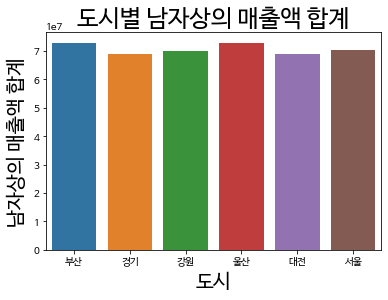

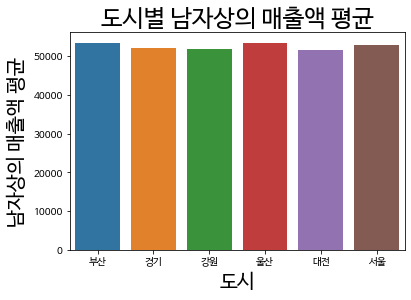

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=df_hist['city'], y=df_hist['price_sum'])
plt.title('도시별 남자상의 매출액 합계', fontsize=24)
plt.xlabel('도시', fontsize=20)
plt.ylabel('남자상의 매출액 합계', fontsize=20)
plt.show()

sns.barplot(x=df_hist['city'], y=df_hist['price_mean'])
plt.title('도시별 남자상의 매출액 평균', fontsize=24)
plt.xlabel('도시', fontsize=20)
plt.ylabel('남자상의 매출액 평균', fontsize=20)
plt.show()